Original Graph Visualization:


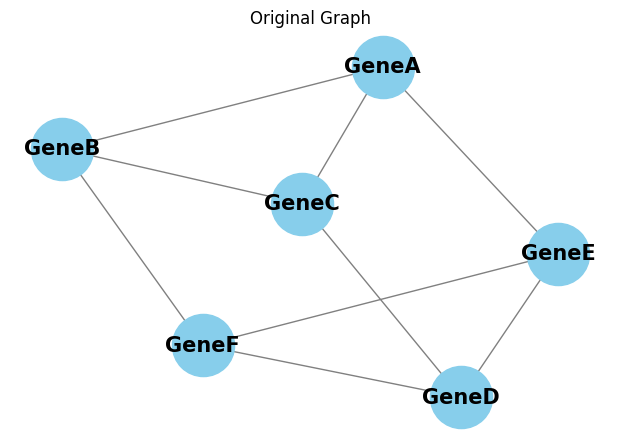


Frequent Subgraphs Visualization:


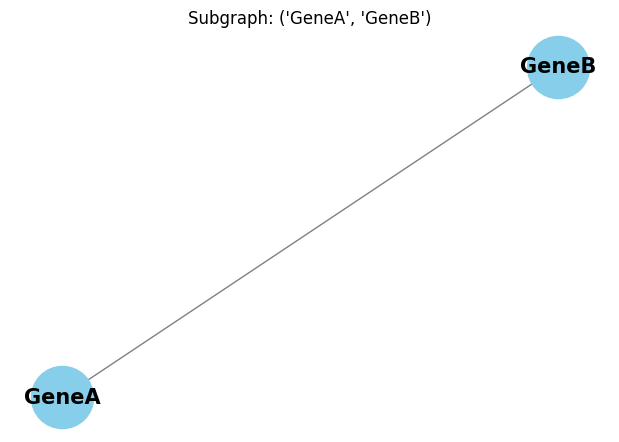

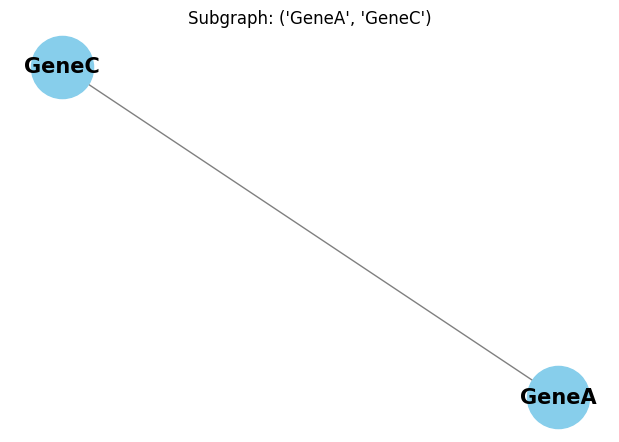

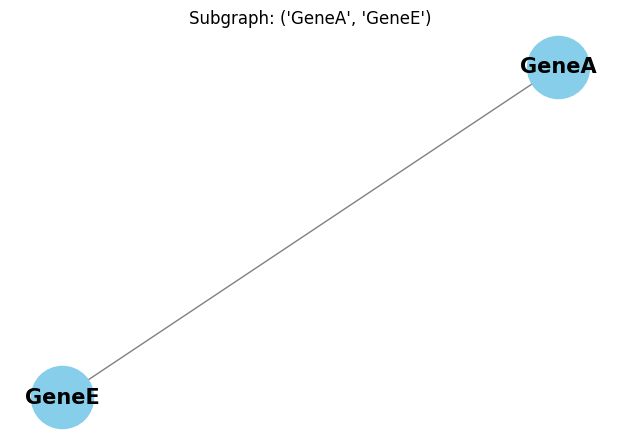

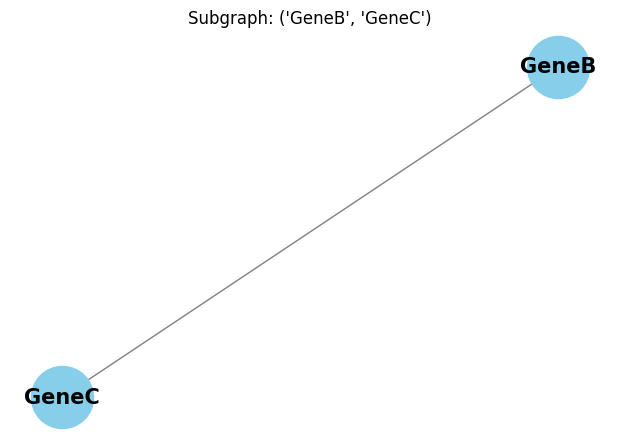

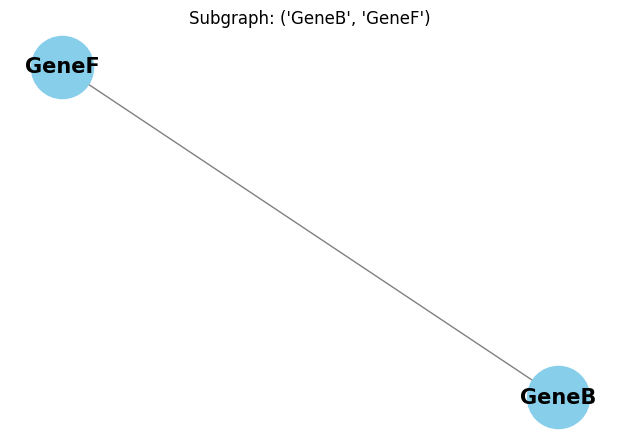

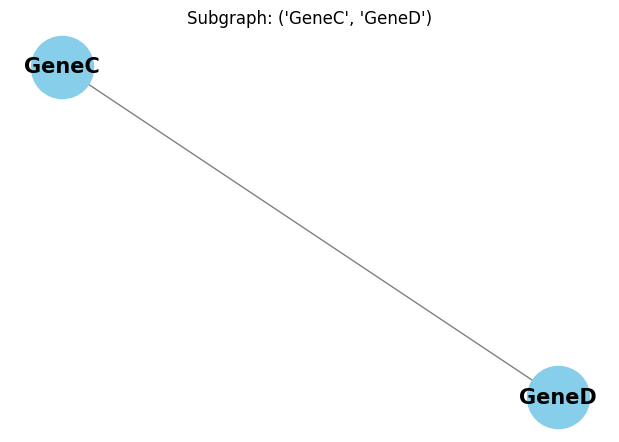

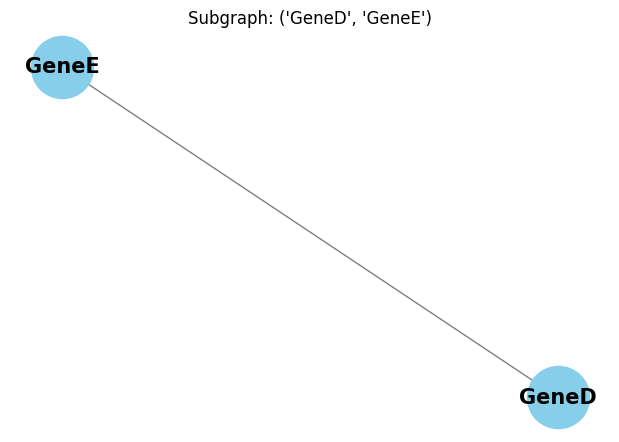

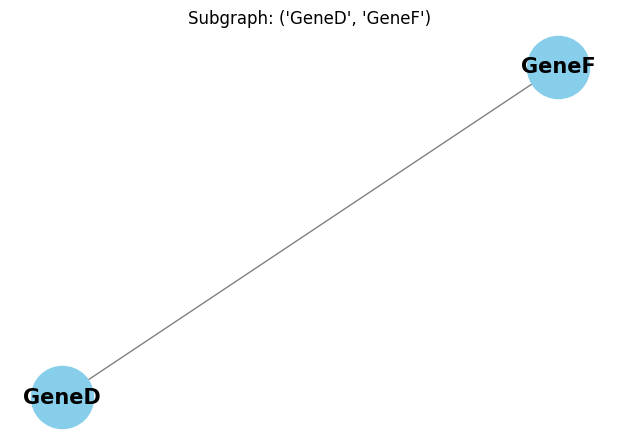

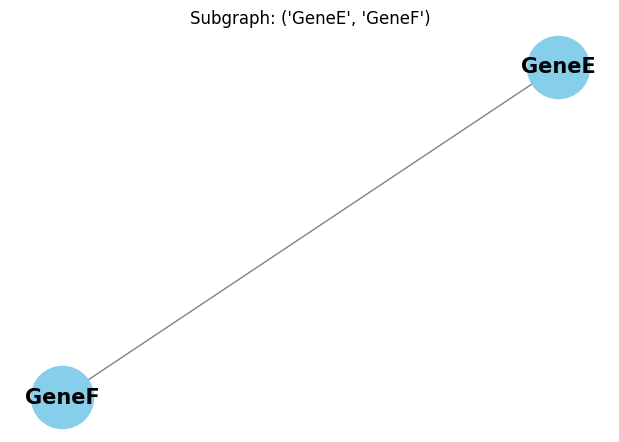

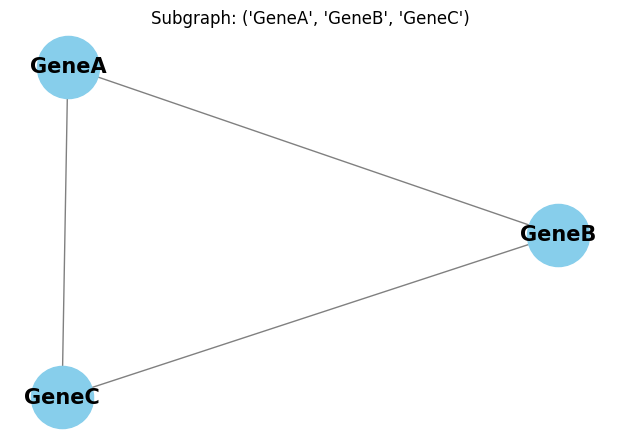

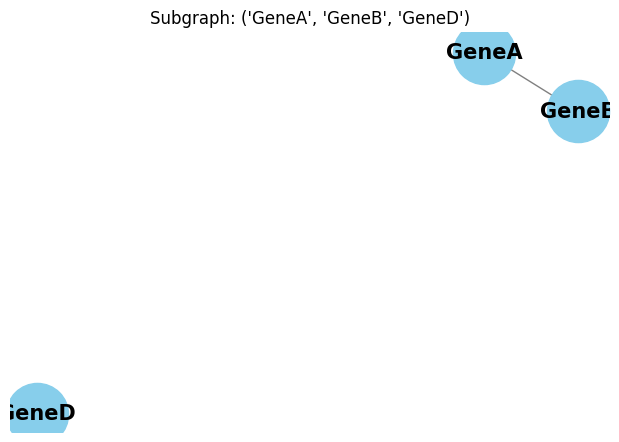

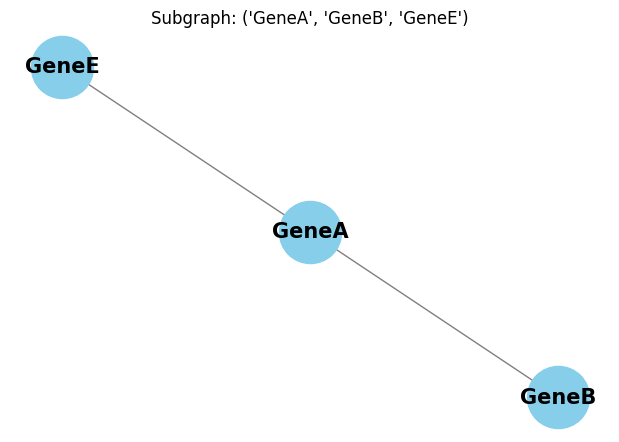

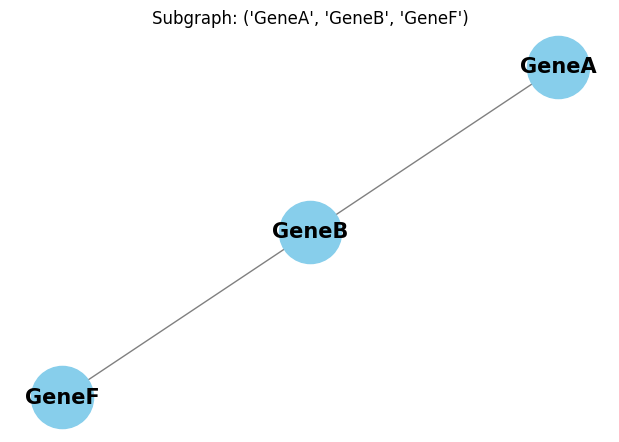

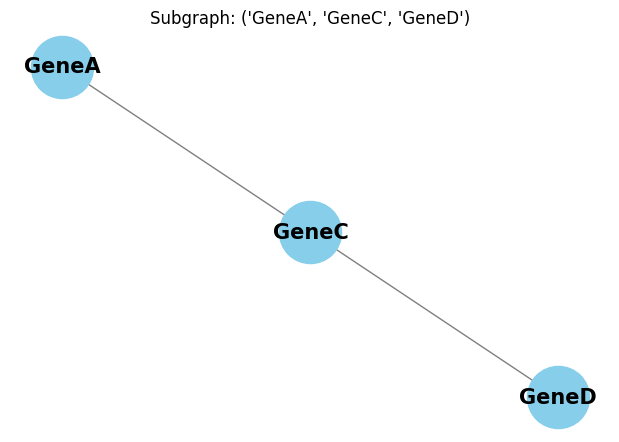

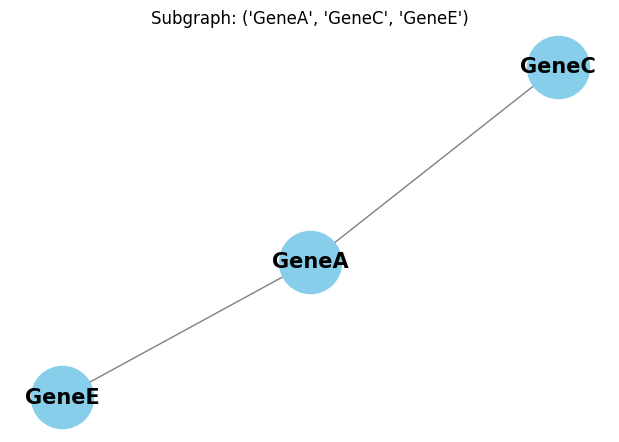

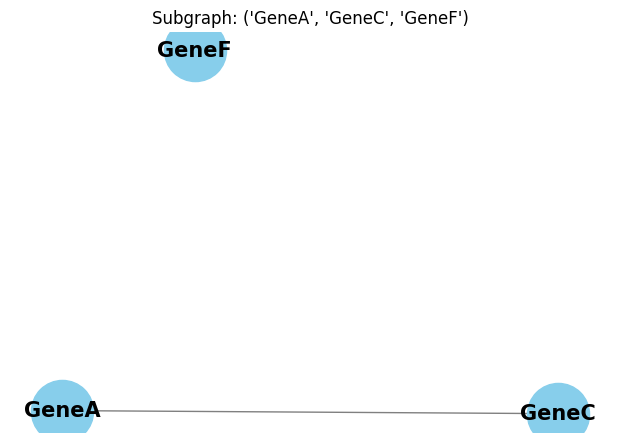

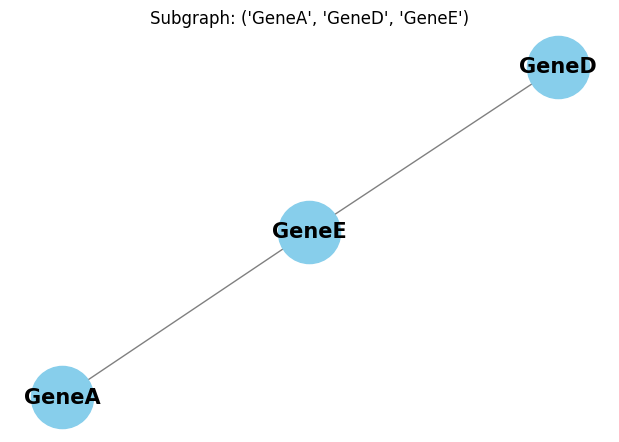

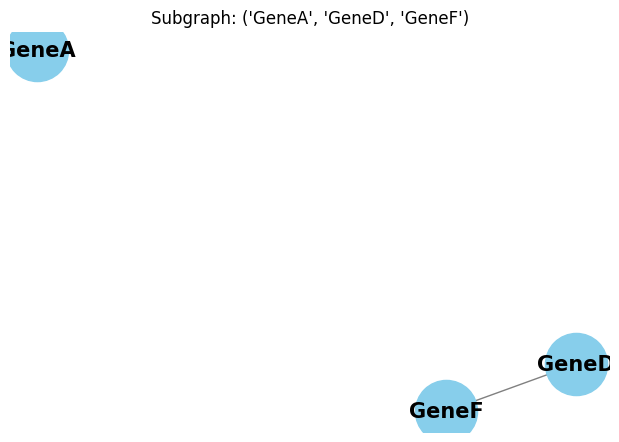

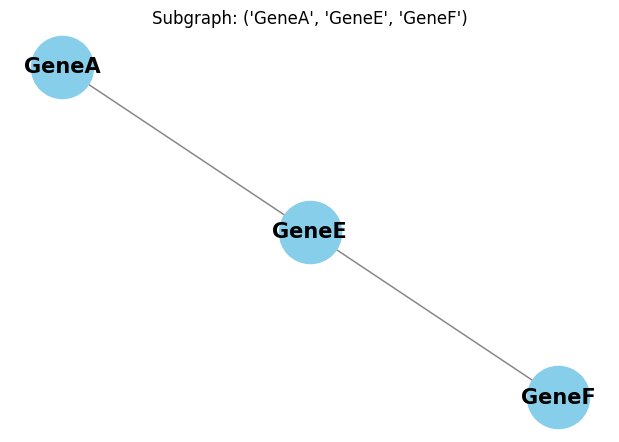

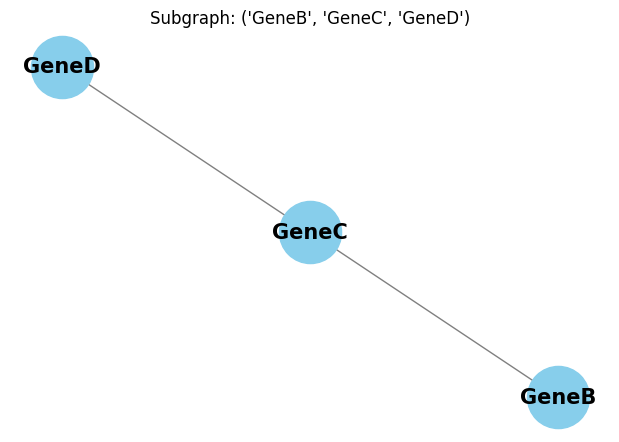

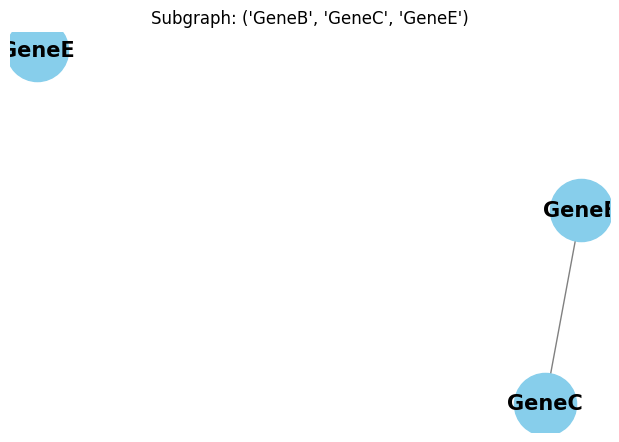

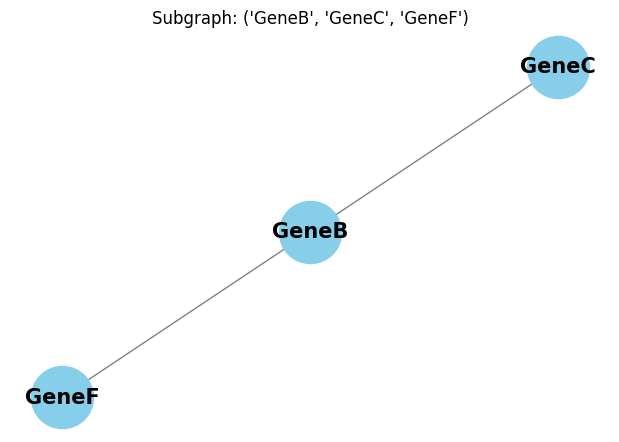

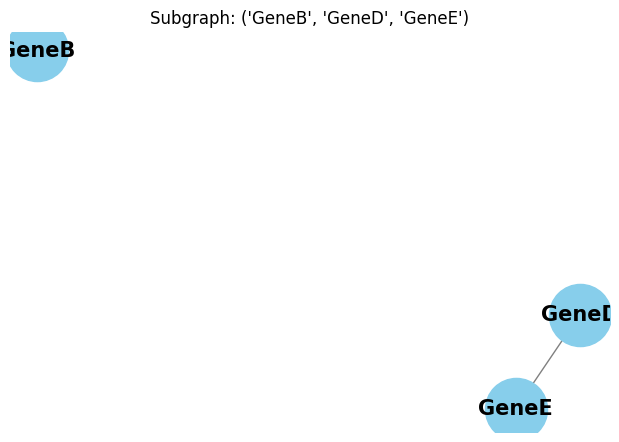

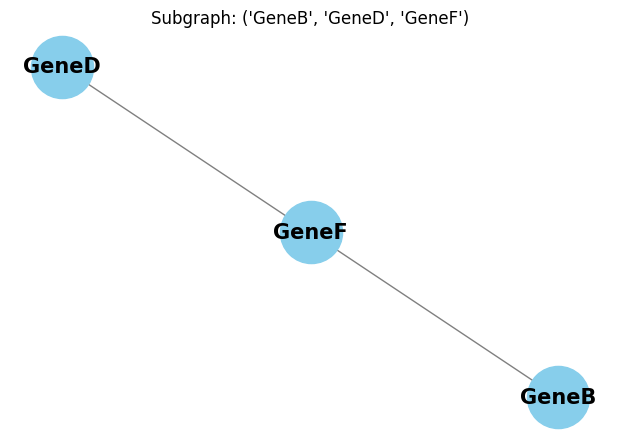

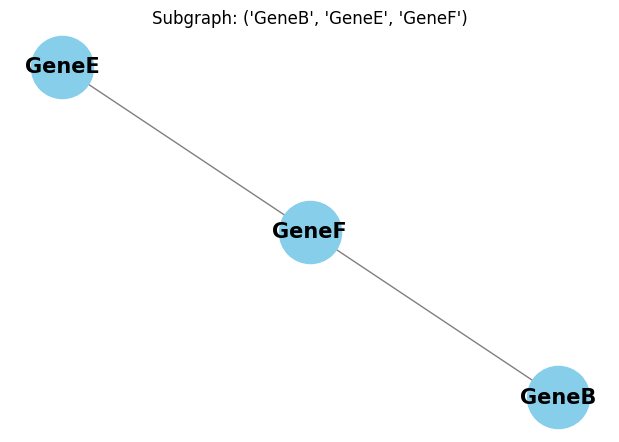

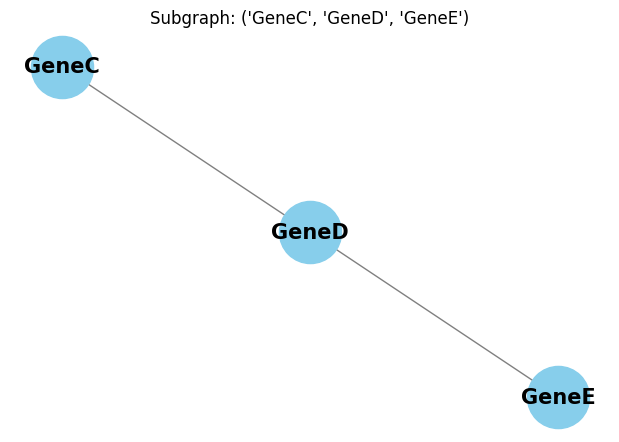

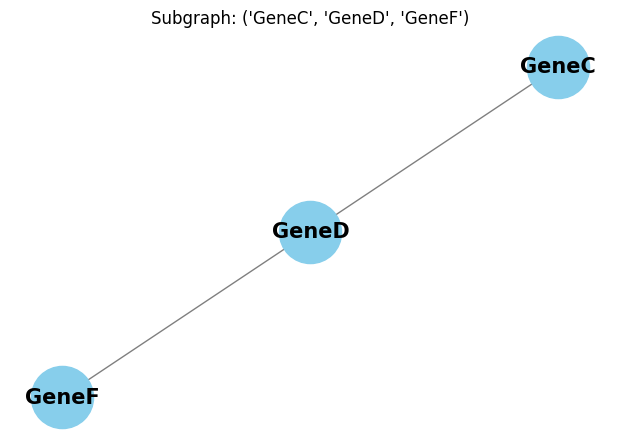

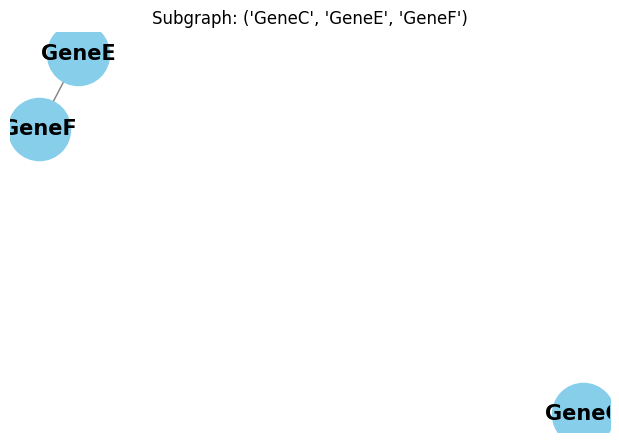

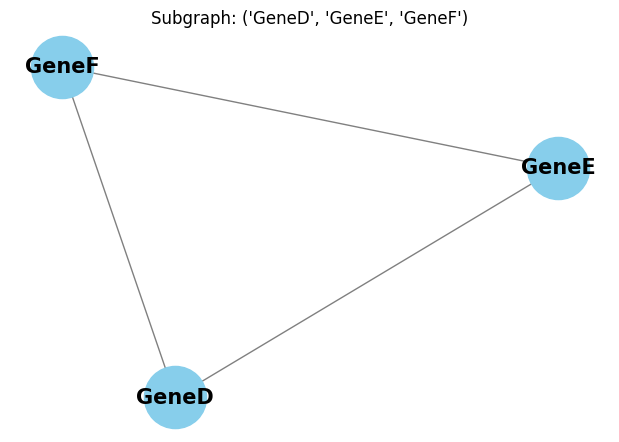

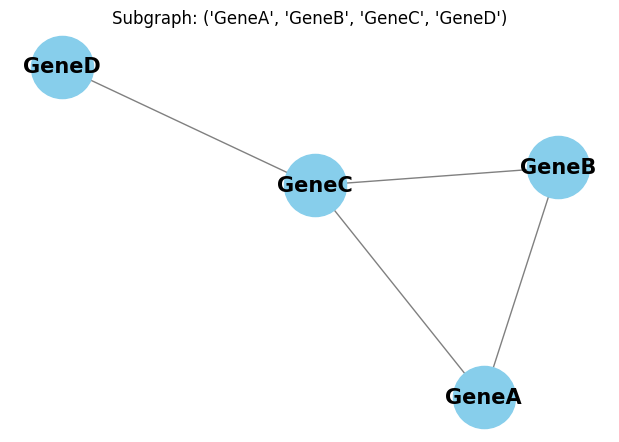

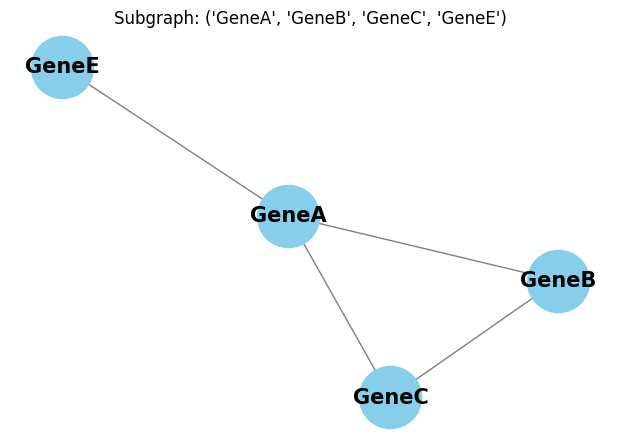

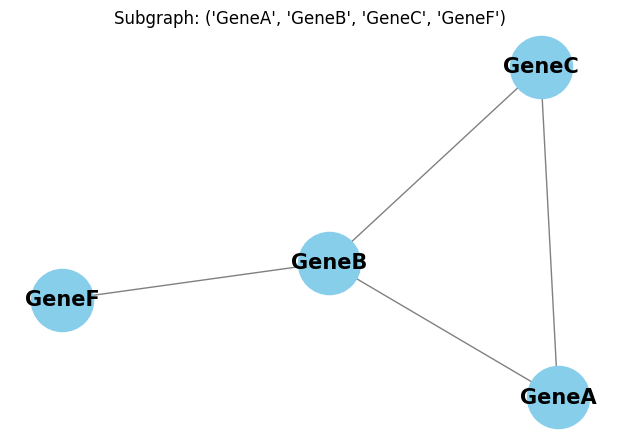

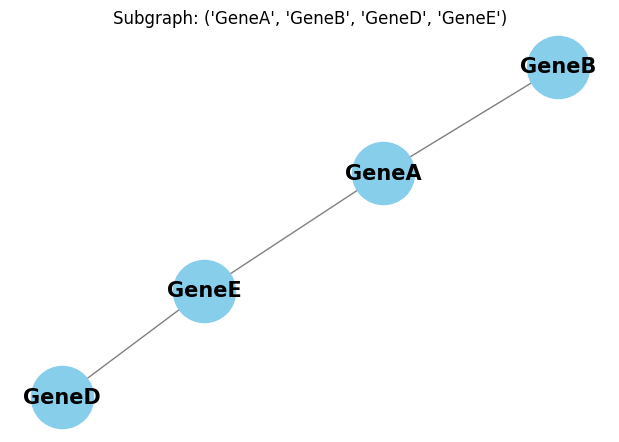

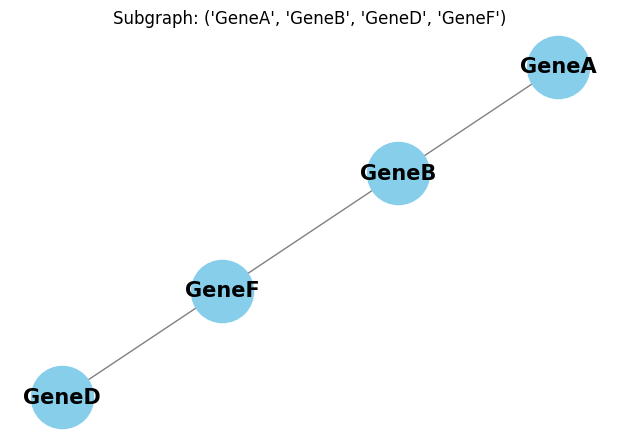

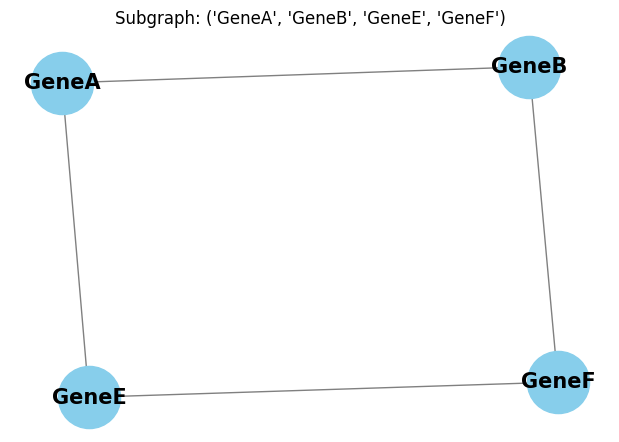

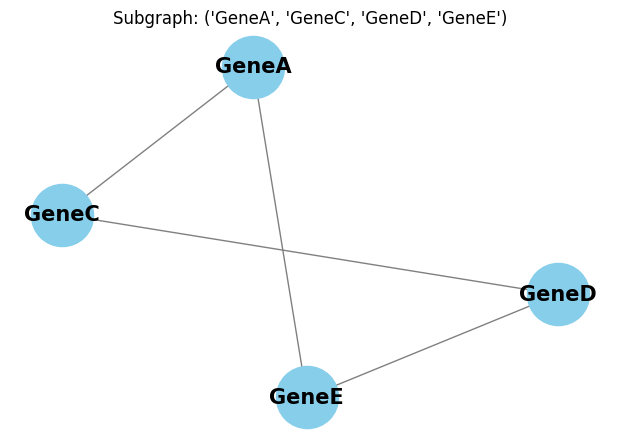

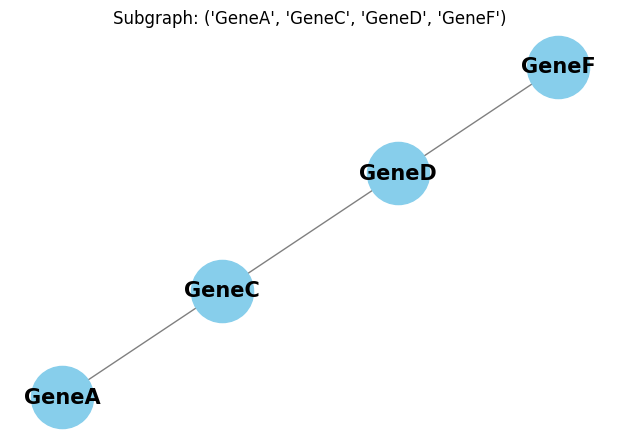

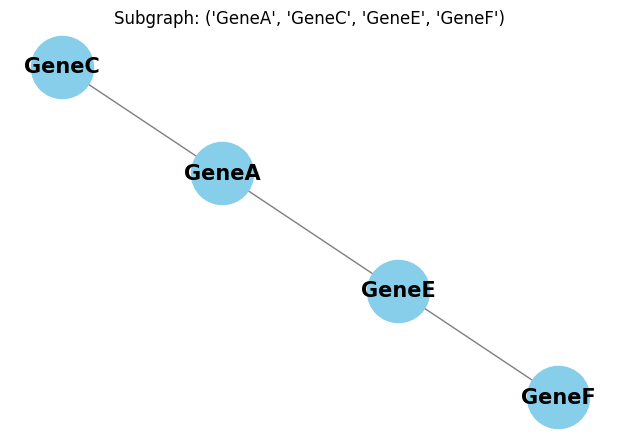

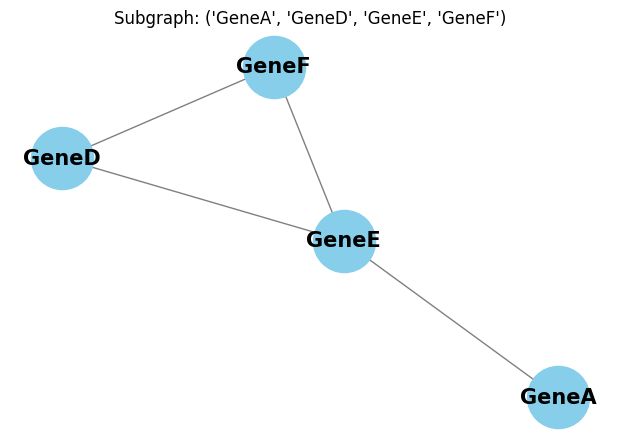

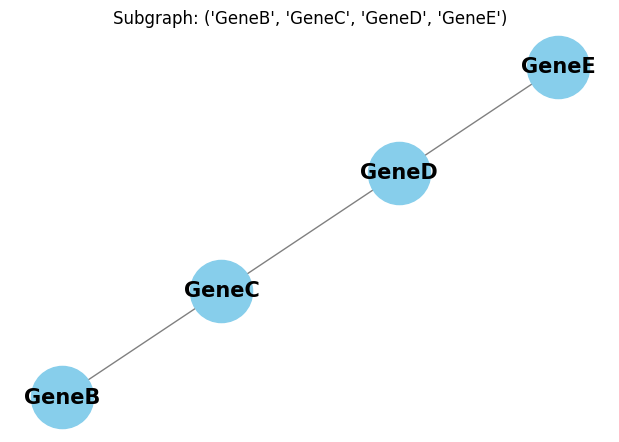

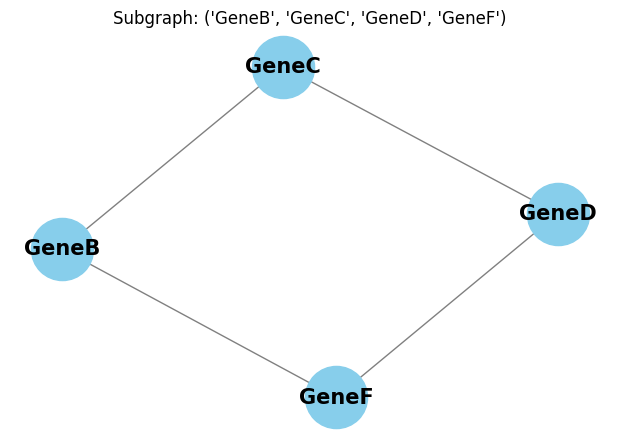

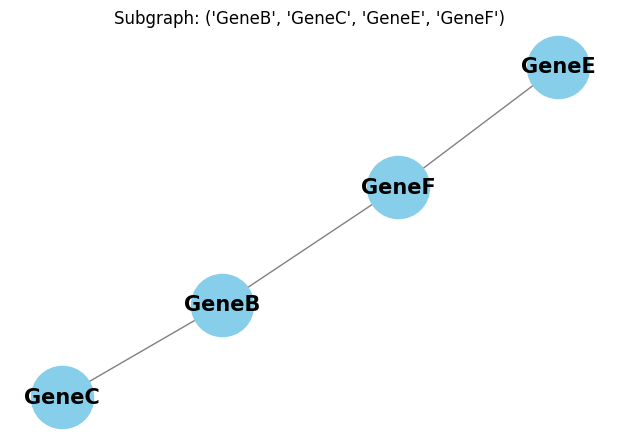

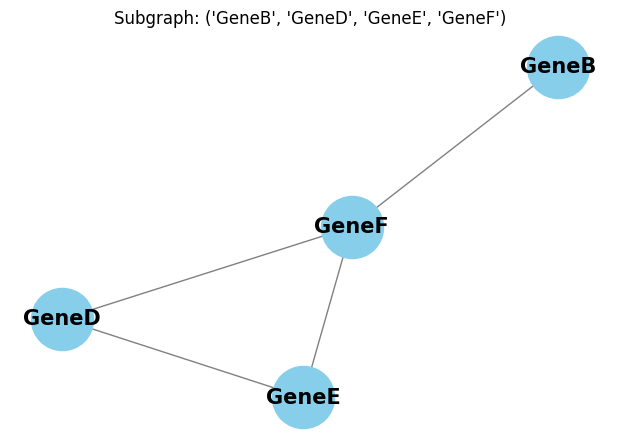

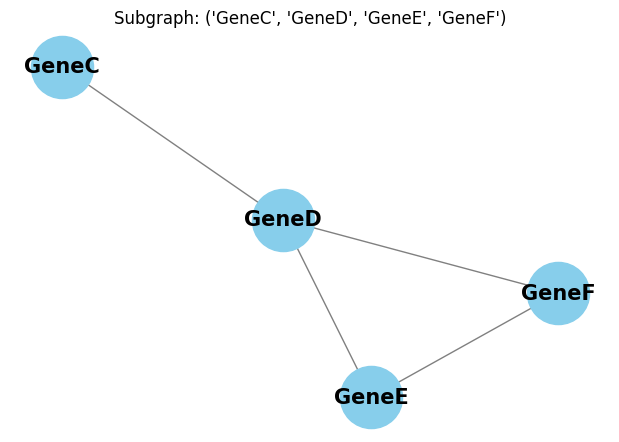

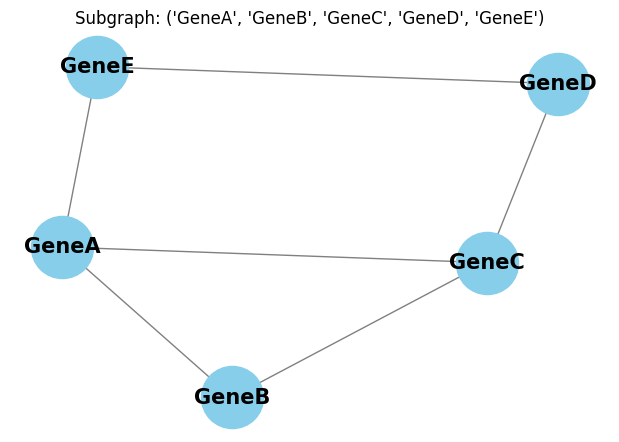

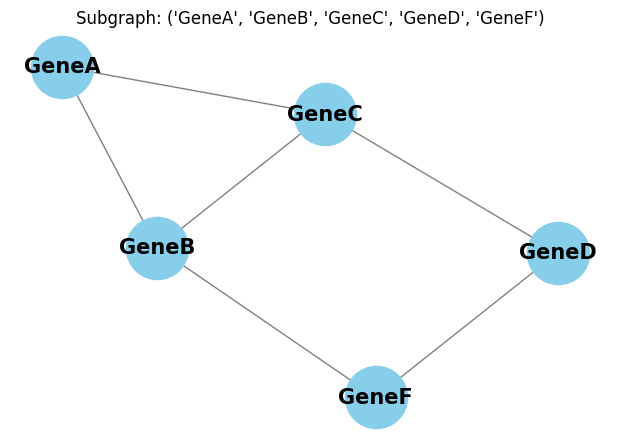

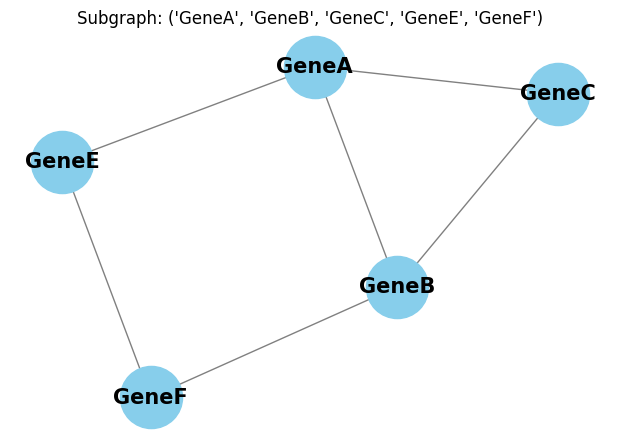

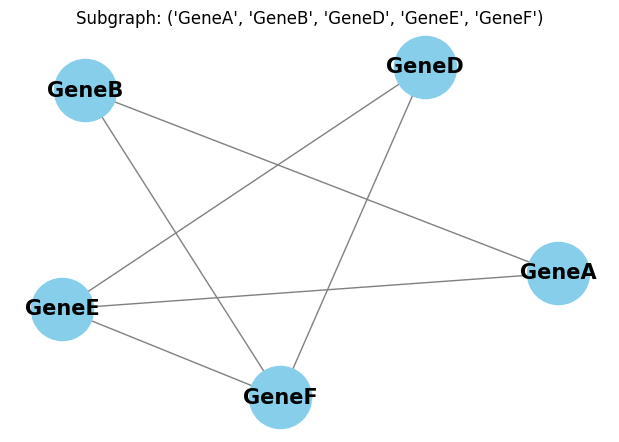

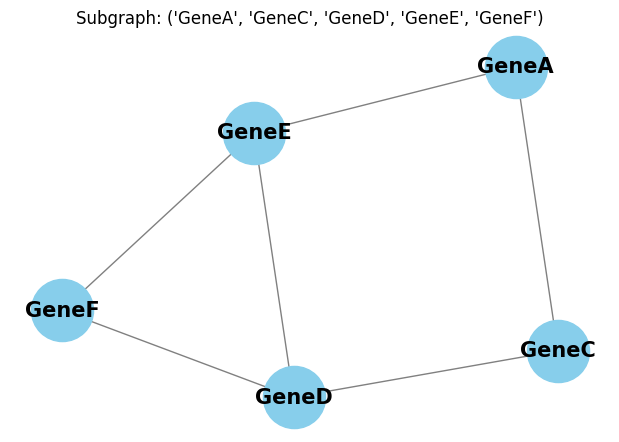

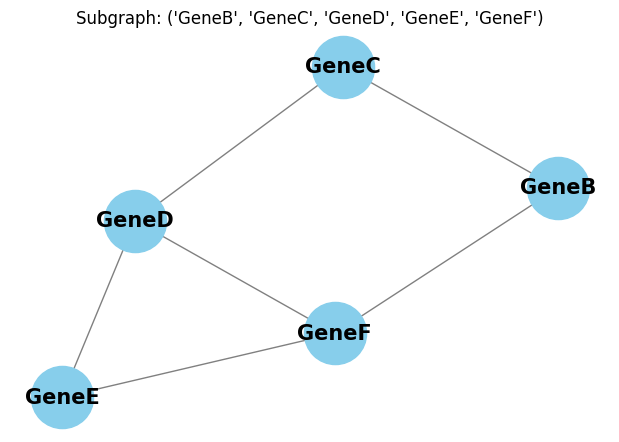

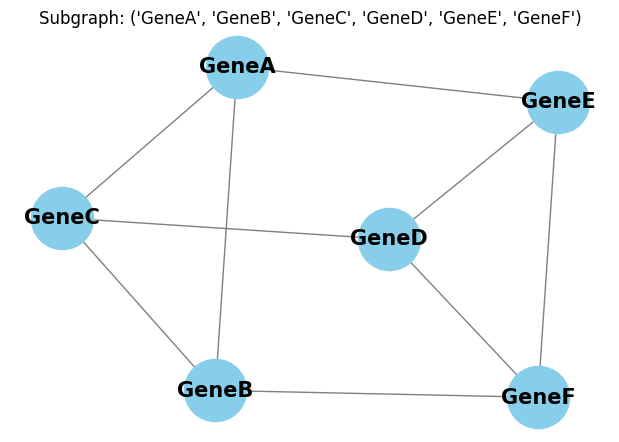

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def create_biological_graph():
    G = nx.Graph()
    edges = [
        ('GeneA', 'GeneB'), ('GeneA', 'GeneC'), ('GeneB', 'GeneC'),
        ('GeneC', 'GeneD'), ('GeneD', 'GeneE'), ('GeneE', 'GeneF'),
        ('GeneA', 'GeneE'), ('GeneB', 'GeneF'), ('GeneD', 'GeneF')
    ]
    G.add_edges_from(edges)
    return G

def find_frequent_subgraphs(graph, min_support):
    frequent_subgraphs = {}
    nodes = list(graph.nodes())
    
    for r in range(1, len(nodes) + 1):
        for node_combination in combinations(nodes, r):
            subgraph = graph.subgraph(node_combination)
            support = len(list(subgraph.edges()))
            
            if support >= min_support:
                frequent_subgraphs[tuple(node_combination)] = subgraph
                
    return frequent_subgraphs

def visualize_subgraph(subgraph, title="Subgraph"):
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_color='black', font_weight='bold', edge_color='gray')
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    G = create_biological_graph()
    print("Original Graph Visualization:")
    visualize_subgraph(G, title="Original Graph")

    min_support = 1
    frequent_subgraphs = find_frequent_subgraphs(G, min_support)

    print("\nFrequent Subgraphs Visualization:")
    for subgraph_nodes, subgraph in frequent_subgraphs.items():
        visualize_subgraph(subgraph, title=f"Subgraph: {subgraph_nodes}")
